# Daten importieren
*Datenquelle: [https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset)*

In [1]:
import pandas as pd

df = pd.read_csv("breast_cancer_data.csv")
df

,symmetry_se,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,0.03003,0.66560,0.7119,0.2654,0.4601,0.11890,True
1,0.01389,0.18660,0.2416,0.1860,0.2750,0.08902,True
2,0.02250,0.42450,0.4504,0.2430,0.3613,0.08758,True
3,0.05963,0.86630,0.6869,0.2575,0.6638,0.17300,True
4,0.01756,0.20500,0.4000,0.1625,0.2364,0.07678,True
...,...,...,...,...,...,...,...
564,0.01114,0.21130,0.4107,0.2216,0.2060,0.07115,True
565,0.01898,0.19220,0.3215,0.1628,0.2572,0.06637,True
566,0.01318,0.30940,0.3403,0.1418,0.2218,0.07820,True
567,0.02324,0.86810,0.9387,0.2650,0.4087,0.12400,True


In [2]:
df.describe()

,symmetry_se,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.020542,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.008266,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.007882,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.015160,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.018730,0.211900,0.226700,0.099930,0.282200,0.080040
75%,0.023480,0.339100,0.382900,0.161400,0.317900,0.092080
max,0.078950,1.058000,1.252000,0.291000,0.663800,0.207500


# Daten aufteilen

In [3]:
X = df.copy()
y = X.pop("diagnosis")

In [4]:
X

,symmetry_se,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.03003,0.66560,0.7119,0.2654,0.4601,0.11890
1,0.01389,0.18660,0.2416,0.1860,0.2750,0.08902
2,0.02250,0.42450,0.4504,0.2430,0.3613,0.08758
3,0.05963,0.86630,0.6869,0.2575,0.6638,0.17300
4,0.01756,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...
564,0.01114,0.21130,0.4107,0.2216,0.2060,0.07115
565,0.01898,0.19220,0.3215,0.1628,0.2572,0.06637
566,0.01318,0.30940,0.3403,0.1418,0.2218,0.07820
567,0.02324,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
y

0       True
1       True
2       True
3       True
4       True
       ...  
564     True
565     True
566     True
567     True
568    False
Name: diagnosis, Length: 569, dtype: bool

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [7]:
y.value_counts() / len(y)

diagnosis
False    0.627417
True     0.372583
Name: count, dtype: float64

In [8]:
y_train.value_counts() / len(y_train)

diagnosis
False    0.626374
True     0.373626
Name: count, dtype: float64

In [9]:
y_test.value_counts() / len(y_test)

diagnosis
False    0.631579
True     0.368421
Name: count, dtype: float64

# Logistische Regression - Modell trainieren


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

# Modell bewerten - F1-Score

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_predict = model.predict(X_test)

precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)

Precision:  0.8387096774193549
Recall:  0.6190476190476191
F1-Score:  0.7123287671232876


# Confusion Matrix

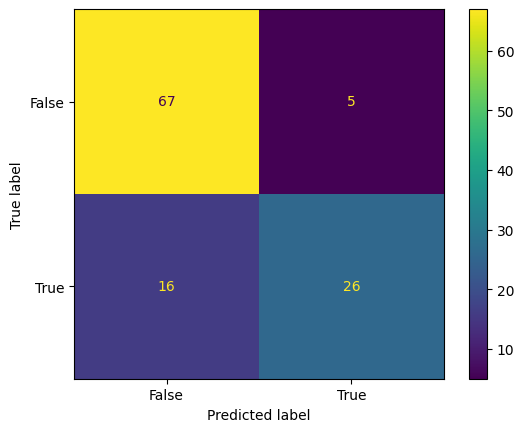

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

# Wahrscheinlichkeiten ausgeben:

In [ ]:
y_proba = model.predict_proba(X_test)[:, 1]
y_proba

array([0.16548206, 0.47793301, 0.27061963, 0.23169225, 0.47343747,
       0.38531437, 0.27865842, 0.56304567, 0.78736507, 0.48637455,
       0.07022972, 0.82521016, 0.55323326, 0.42106417, 0.72808319,
       0.12508328, 0.21672562, 0.26663393, 0.10478066, 0.18225002,
       0.50050633, 0.56965006, 0.35590316, 0.43743253, 0.91978973,
       0.16596932, 0.21229703, 0.07174112, 0.33012182, 0.35713101,
       0.20511057, 0.41853576, 0.55591558, 0.5692417 , 0.21604875,
       0.16096091, 0.08405375, 0.05306293, 0.05276281, 0.97370595,
       0.47549423, 0.37872405, 0.22352216, 0.7876852 , 0.89349561,
       0.39777476, 0.06047813, 0.10686465, 0.346337  , 0.28359829,
       0.10562761, 0.11573552, 0.0894863 , 0.09303711, 0.16456754,
       0.6416295 , 0.27833112, 0.23671176, 0.18482801, 0.08015792,
       0.17557224, 0.39209814, 0.32060324, 0.68156581, 0.26647457,
       0.15341049, 0.12408703, 0.93864775, 0.6340855 , 0.4254728 ,
       0.30834855, 0.19098605, 0.16642532, 0.10878292, 0.16601

In [ ]:
y_threshold = y_proba >= 0.3

precision = precision_score(y_test, y_threshold)
recall = recall_score(y_test, y_threshold)
f1 = f1_score(y_test, y_threshold)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)

Precision:  0.6607142857142857
Recall:  0.8809523809523809
F1-Score:  0.7551020408163266


# Precision-Recall-Tradeoff visualisieren

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

Text(0.5, 0, 'Thresholds')

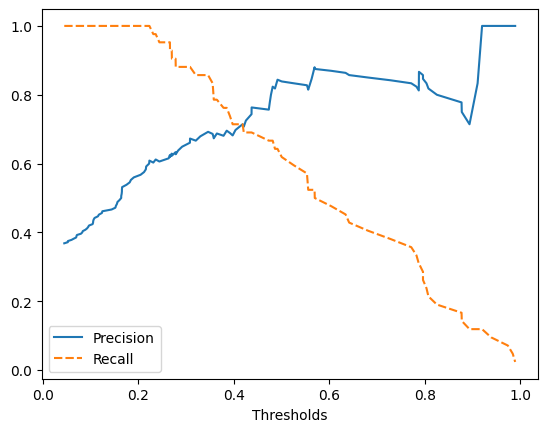

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = pd.DataFrame({
    "Precision": precisions[:-1],
    "Recall": recalls[:-1],
}, index=thresholds)

sns.lineplot(metrics)
plt.xlabel("Thresholds")